# Profiling with [IPython](http://ipython.readthedocs.io/en/stable/index.html)
Interactive Python provides some [Built-in magic commands](http://ipython.readthedocs.io/en/stable/interactive/magics.html) that can help up when developing code.

### `?`
IPython's help.

In [ ]:
?

### `%quickref`
Quick reference.

In [ ]:
%quickref

### `help`
Python’s own help system.

In [ ]:
help

### `object?`
Details about ‘object’, use ‘object??’ for extra details.

In [ ]:
a = 1
a?

### `! <command>`
Forks a shell, run a command in it, exits the shell and returns.

In [ ]:
!cd /

In [ ]:
!pwd

### `%cd`

Change the current working directory.

In [ ]:
%cd /

In [ ]:
!pwd

In [ ]:
%cd ~/YAPT

In [ ]:
!pwd

### `who`/`whos`
Print all interactive variables

In [ ]:
%whos

### `%time <Python statement`/`expression>`

time <Python statement`/`expression>`
Temporize the execution of a Python statement or expression, remembering its results.

In [ ]:
a

In [ ]:
%time a=3

In [ ]:
a

### `%timeit <Python statement`/`expression>`
Really temporize the execution of a Python statement or expression, but forgeting its results.

In [ ]:
a

In [ ]:
%timeit a=4

In [ ]:
a

### `%run <python module>.py`
Run the named file inside IPython as a program.

In [ ]:
%run hello_world.py

In [ ]:
!cat module.py

In [ ]:
%run module.py

In [ ]:
%whos

In [ ]:
a

### `%run -t <python module>.py`

In [1]:
!cat substract_curves.py

#!/usr/bin/env python3

import sys, math, scipy.interpolate

''' Inputs two sets of points (from two curves), interpolate one of
they in the points of the other and returns the difference between
interpolated (first curve) and real points (second curve). The
diference samples are output through the stdout.

USAGE EXAMPLE:

./interplate.py data_file_1.dat data_file_2.dat > data_file_3.dat

# Note: the domain of data_file_2 must be included in the domain of data_file_1.
'''

# First curve
x = [0.0] # X coordinates
y = [0.0] # Y coordinates

f = open(sys.argv[1])
line = f.readline()
while (line != ""):
    if "#" != line[0]:
        splitted_line = line.split()
        x.append(float(splitted_line[0]))
        y.append(float(splitted_line[1]))
    line = f.readline()

f.close()

# Create the interpolate function
y_interp = scipy.interpolate.interp1d(x,y)

# Evaluate the first curve at the x coordinates of the second one

f = open(sys.argv[2])
line = f.readline()
while (line != ""):
    if

In [8]:
!paste dataset1.txt dataset2.txt

1	20	0	20
3	20	2	20
5	20	4	30
7	20	6	20
9	20	8	20


In [9]:
%run substract_curves.py dataset1.txt dataset2.txt

0.0 	 20.0
2.0 	 0.0
4.0 	 10.0
6.0 	 0.0
8.0 	 0.0


In [102]:
import io
import numpy as np
x = 0
base = []
with io.open('dataset3.txt', 'w') as file:
    for i in range(100):
        x += np.random.randint(10) - 4.5
        file.write('{}\t{}\n'.format(i*2,x))
        base.append(x)

with io.open('dataset4.txt', 'w') as file:
    for i in range(99):
        x = base[i] + np.random.randint(10) - 4.5
        file.write('{}\t{}\n'.format(i*2+1,x))
        #x += np.random.randint(10) - 4.5
        #file.write('{}\t{}\n'.format(i*2+1,x))

In [103]:
#!paste dataset3.txt dataset4.txt

In [104]:
#from IPython.utils import io
#with io.capture_output() as captured:
#%%capture substract_curves.py dataset3.txt dataset4.txt
#print(captured.stdout)
from IPython.utils import io
with io.capture_output() as captured:
    !python substract_curves.py dataset3.txt dataset4.txt
#print(captured.stdout)
import io
with io.open('differences.txt', 'w') as file:
    file.write(captured.stdout)

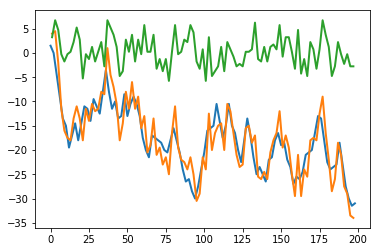

In [105]:
import matplotlib.pyplot as plt
plt.plot(*np.loadtxt("dataset3.txt",unpack=True), linewidth=2.0)
plt.plot(*np.loadtxt("dataset4.txt",unpack=True), linewidth=2.0)
plt.plot(*np.loadtxt("differences.txt",unpack=True), linewidth=2.0)
plt.show()